In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [4]:
dataset = pd.read_csv("w3task2_dataset.csv")
dataset.head()

,Area_sqft,Bedrooms,Age_of_Home,Price
0,3674,2,42,513329.0
1,1360,4,51,215973.0
2,1794,1,45,236174.0
3,1630,5,13,313668.0
4,1595,3,63,199515.0


In [6]:
# Compute correlation matrix
correlation = dataset.corr()

# Display correlation with Price
print("Correlation with Price:")
print(correlation['Price'].sort_values(ascending=False))

# Optional: Heatmap for better visualization
# plt.figure(figsize=(6,4))
# sns.heatmap(correlation, annot=True, cmap='coolwarm')
# plt.title("Feature Correlation Heatmap")
# plt.show()


Correlation with Price:
Price          1.000000
Area_sqft      0.942381
Bedrooms       0.169547
Age_of_Home   -0.205164
Name: Price, dtype: float64


In [7]:
# Features and target
X = dataset[['Area_sqft', 'Bedrooms', 'Age_of_Home']]
y = dataset['Price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display first 5 rows of training features
print("X_train:")
print(X_train.head())

# Display first 5 rows of training target
print("\ny_train:")
print(y_train.head())


X_train:
      Area_sqft  Bedrooms  Age_of_Home
5894       3914         2           96
3728       2458         5           86
8958       1468         1           35
7671       1955         4           42
5999       2438         4           42

y_train:
5894    500964.0
3728    363332.0
8958    248195.0
7671    330166.0
5999    317022.0
Name: Price, dtype: float64


In [8]:
# Create the Multiple Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print coefficients and intercept
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
print("Coefficients for each feature:")
print(coeff_df)

print("\nIntercept:", model.intercept_)


Coefficients for each feature:
       Feature   Coefficient
0    Area_sqft    149.206381
1     Bedrooms  19472.589646
2  Age_of_Home  -1167.671320

Intercept: 2490.645384826348


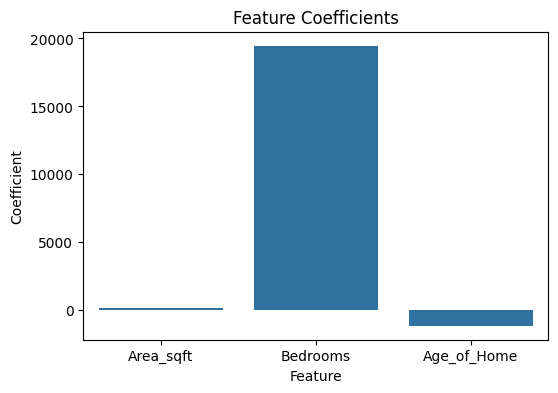

In [9]:
plt.figure(figsize=(6,4))
sns.barplot(x='Feature', y='Coefficient', data=coeff_df)
plt.title("Feature Coefficients")
plt.show()


In [10]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² score on test data: {r2:.4f}")


R² score on test data: 0.9662
